texte en italique
# **Importations**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Chargement des donnees

In [3]:


# Chargement des données
data = pd.read_csv("Evaluation_clip.csv")

# Normaliser les noms des pipelines (exemple: retirer les numéros des noms)
data['pipeline_normalized'] = data['pipeline'].str.extract(r'(\D+)')

# Afficher les noms normalisés pour vérifier
print(data['pipeline_normalized'].unique())


['_SD_FINETUNED_IMAGES_triposr' '_MVDREAM_IMAGES_triposr'
 '_SD_IMAGES_triposr' '_SD_IMAGES_CRM' '_MVDREAM_IMAGES_CRM'
 '_SD_FINETUNED_IMAGES_CRM']


#Analyse Plus Détaillée

Après regroupement, nous pouvons calculer des statistiques descriptives pour chaque groupe de pipelines et réaliser des tests statistiques pour comparer les variances entre les groupes.

Regrouper les données permettra de voir les tendances de performances pour chaque type de pipeline plutôt que pour chaque instance spécifique. Ensuite faire de l'analyse ANOVA qui est utile pour déterminer si les différences entre les moyennes des groupes de pipelines sont statistiquement significatives, indiquant si certains pipelines sont globalement meilleurs ou pires que d'autres.
Les visualisations aideront à illustrer clairement les performances relatives et à identifier visuellement les outliers ou les variations importantes entre les groupes.

In [8]:
# Statistiques descriptives par groupe de pipeline
grouped_data = data.groupby('pipeline_normalized')['Average Score'].describe()
print(grouped_data)

# Test ANOVA pour comparer les moyennes des groupes
from scipy.stats import f_oneway

# Regrouper les scores par pipeline pour le test ANOVA
scores_by_pipeline = [group['Average Score'].values for name, group in data.groupby('pipeline_normalized')]

f_stat, p_value = f_oneway(*scores_by_pipeline)
print('ANOVA test results: F-Statistic = {:.2f}, p-value = {:.3f}'.format(f_stat, p_value))



                              count     mean       std   min     25%    50%  \
pipeline_normalized                                                           
_MVDREAM_IMAGES_CRM           100.0  0.30260  0.037649  0.22  0.2800  0.310   
_MVDREAM_IMAGES_triposr        99.0  0.28101  0.038079  0.16  0.2500  0.280   
_SD_FINETUNED_IMAGES_CRM      100.0  0.29770  0.035784  0.19  0.2775  0.300   
_SD_FINETUNED_IMAGES_triposr  100.0  0.28310  0.037165  0.17  0.2600  0.280   
_SD_IMAGES_CRM                100.0  0.29860  0.037980  0.20  0.2800  0.305   
_SD_IMAGES_triposr            100.0  0.28460  0.038571  0.18  0.2600  0.285   

                                 75%   max  
pipeline_normalized                         
_MVDREAM_IMAGES_CRM           0.3300  0.37  
_MVDREAM_IMAGES_triposr       0.3050  0.36  
_SD_FINETUNED_IMAGES_CRM      0.3200  0.37  
_SD_FINETUNED_IMAGES_triposr  0.3100  0.37  
_SD_IMAGES_CRM                0.3200  0.37  
_SD_IMAGES_triposr            0.3125  0.37  
ANOVA t

Statistiques Descriptives par Groupe de Pipeline
Les statistiques que montrent les performances pour chaque groupe de pipeline, normalisées pour une comparaison plus pertinente. Voici les points saillants de chaque groupe :

MVDREAM_IMAGES_CRM

Moyenne: 0.303, indiquant de bonnes performances globales.
Écart-type: 0.038, ce qui signifie une variabilité modérée dans les scores.
Range de Scores: 0.22 à 0.37.
MVDREAM_IMAGES_triposr

Moyenne: 0.281, légèrement inférieure à celle de MVDREAM_IMAGES_CRM.
Écart-type: 0.038, similaire à MVDREAM_IMAGES_CRM, indiquant une variabilité comparable.
Range de Scores: 0.16 à 0.36.
SD_FINETUNED_IMAGES_CRM

Moyenne: 0.298, une performance robuste.
Écart-type: 0.036, indiquant une cohérence raisonnable dans les scores.
Range de Scores: 0.19 à 0.37.
SD_FINETUNED_IMAGES_triposr

Moyenne: 0.283, un peu moins performante que la version CRM.
Écart-type: 0.037, variabilité modérée.
Range de Scores: 0.17 à 0.37.
SD_IMAGES_CRM

Moyenne: 0.299, parmi les meilleures performances.
Écart-type: 0.038, similaire à d'autres pipelines.
Range de Scores: 0.20 à 0.37.
SD_IMAGES_triposr

Moyenne: 0.285, performances moyennes par rapport aux autres pipelines SD.
Écart-type: 0.039, légèrement plus élevé, indiquant une plus grande variabilité.
Range de Scores: 0.18 à 0.37.

#Résultats du Test ANOVA
F-Statistic: 6.23
p-value: 0.000

#Interprétation des Résultats
Les résultats du test ANOVA indiquent une différence statistiquement significative entre les moyennes des groupes de pipelines. Avec une p-value de 0.000, nous pouvons rejeter l'hypothèse nulle qui stipule que toutes les moyennes des groupes sont égales. Cela signifie que les différences observées dans les performances des pipelines sont significatives et non dues au hasard.



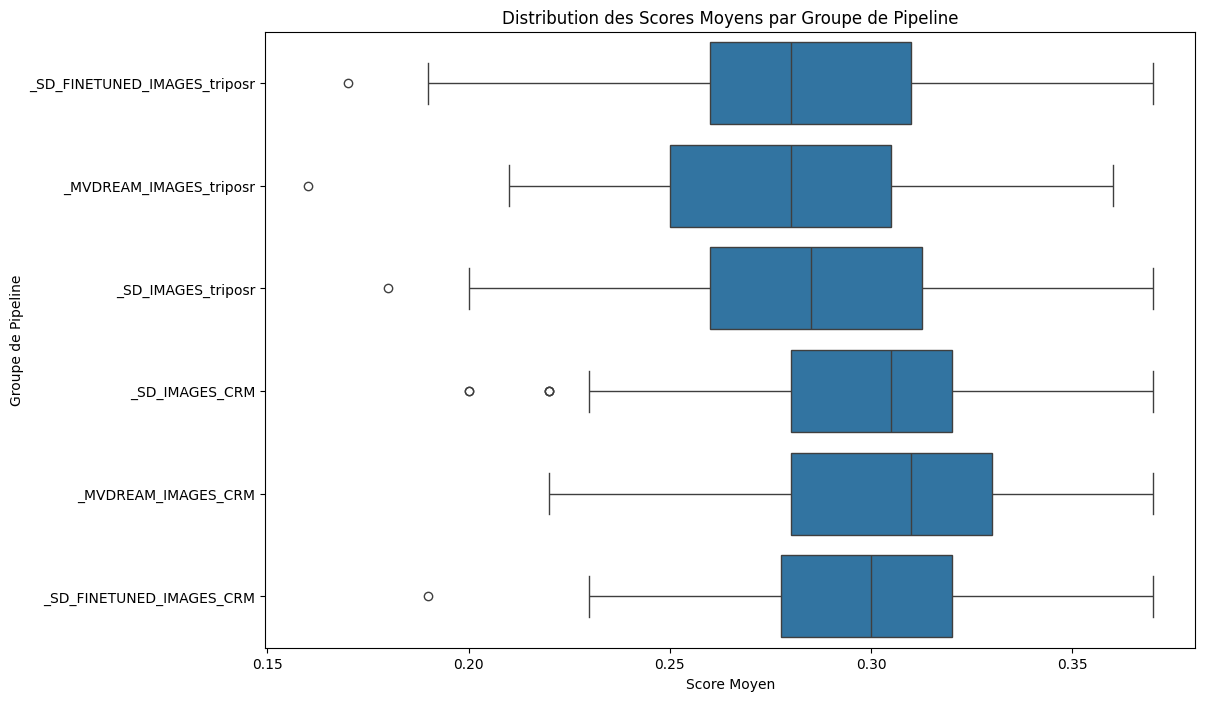

In [9]:
# Boîte à moustaches pour visualiser la distribution des scores par groupe de pipeline
plt.figure(figsize=(12, 8))
sns.boxplot(x='Average Score', y='pipeline_normalized', data=data)
plt.title('Distribution des Scores Moyens par Groupe de Pipeline')
plt.xlabel('Score Moyen')
plt.ylabel('Groupe de Pipeline')
plt.show()

Nombre de fois que chaque pipeline est classé comme le meilleur par dossier:
pipeline_normalized
_MVDREAM_IMAGES_CRM             27
_SD_IMAGES_CRM                  26
_SD_FINETUNED_IMAGES_CRM        18
_SD_IMAGES_triposr              11
_SD_FINETUNED_IMAGES_triposr    10
_MVDREAM_IMAGES_triposr          8
Name: count, dtype: int64


<ipython-input-15-15b2bf709e28>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_pipeline_counts.index, y=best_pipeline_counts.values, palette='viridis')


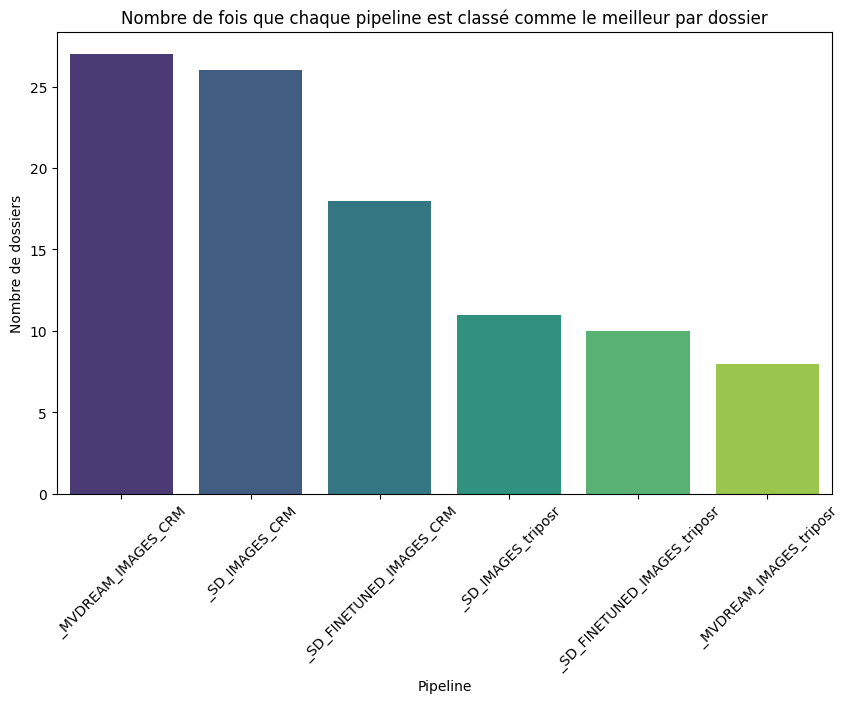

In [15]:
# Normalisation des noms des pipelines
data['pipeline_normalized'] = data['pipeline'].str.extract(r'(\D+)')

# Trouver le pipeline avec le score moyen le plus élevé pour chaque dossier
best_pipelines_per_folder = data.loc[data.groupby('Folder')['Average Score'].idxmax()]

# Compter combien de fois chaque pipeline est classé comme le meilleur
best_pipeline_counts = best_pipelines_per_folder['pipeline_normalized'].value_counts()

# Affichage des résultats
print("Nombre de fois que chaque pipeline est classé comme le meilleur par dossier:")
print(best_pipeline_counts)

# Créer un graphique à barres pour visualiser les résultats
plt.figure(figsize=(10, 6))
sns.barplot(x=best_pipeline_counts.index, y=best_pipeline_counts.values, palette='viridis')
plt.title('Nombre de fois que chaque pipeline est classé comme le meilleur par dossier')
plt.xlabel('Pipeline')
plt.ylabel('Nombre de dossiers')
plt.xticks(rotation=45)  # Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.show()

Nombre de fois que chaque groupe de pipeline est classé comme le meilleur par dossier:
pipeline_group
SD_IMAGES              37
MVDREAM_IMAGES         35
SD_FINETUNED_IMAGES    28
Name: count, dtype: int64


<ipython-input-6-47fbe9f1bb6f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_pipeline_group_counts.index, y=best_pipeline_group_counts.values, palette='viridis')


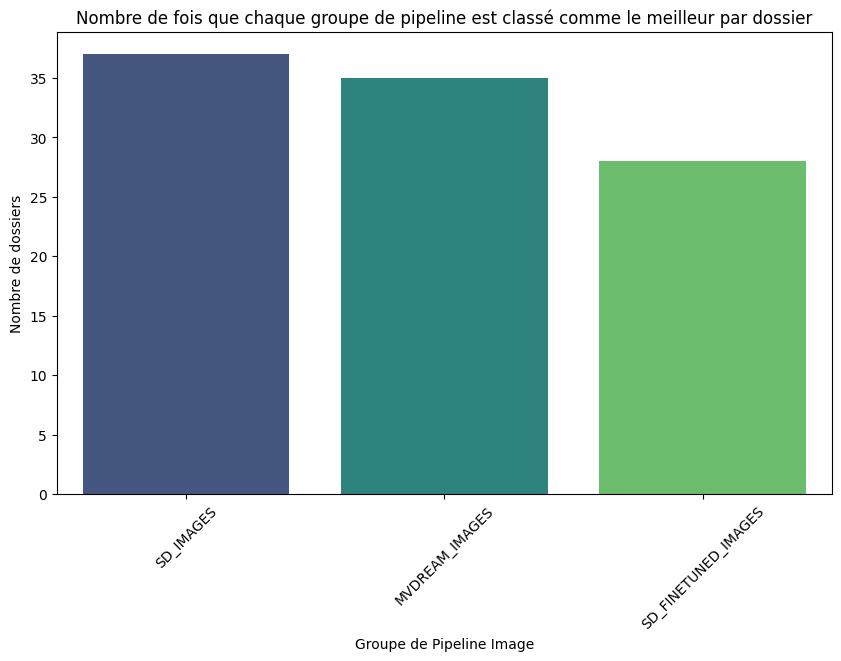

In [6]:
# Normalisation des noms des pipelines pour regrouper par type général
data['pipeline_group'] = data['pipeline'].str.extract(r'(SD_FINETUNED_IMAGES|SD_IMAGES|MVDREAM_IMAGES)')

# Trouver le pipeline avec le score moyen le plus élevé pour chaque dossier
best_pipelines_per_folder = data.loc[data.groupby('Folder')['Average Score'].idxmax()]

# Compter combien de fois chaque groupe de pipeline est classé comme le meilleur
best_pipeline_group_counts = best_pipelines_per_folder['pipeline_group'].value_counts()

# Affichage des résultats
print("Nombre de fois que chaque groupe de pipeline est classé comme le meilleur par dossier:")
print(best_pipeline_group_counts)

# Créer un graphique à barres pour visualiser les résultats
plt.figure(figsize=(10, 6))
sns.barplot(x=best_pipeline_group_counts.index, y=best_pipeline_group_counts.values, palette='viridis')
plt.title('Nombre de fois que chaque groupe de pipeline est classé comme le meilleur par dossier')
plt.xlabel('Groupe de Pipeline Image')
plt.ylabel('Nombre de dossiers')
plt.xticks(rotation=45)  # Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.show()


Nombre de fois que chaque groupe de pipeline est classé comme le meilleur par dossier:
pipeline_group
CRM        71
triposr    29
Name: count, dtype: int64


<ipython-input-7-700d44902890>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_pipeline_group_counts.index, y=best_pipeline_group_counts.values, palette='viridis')


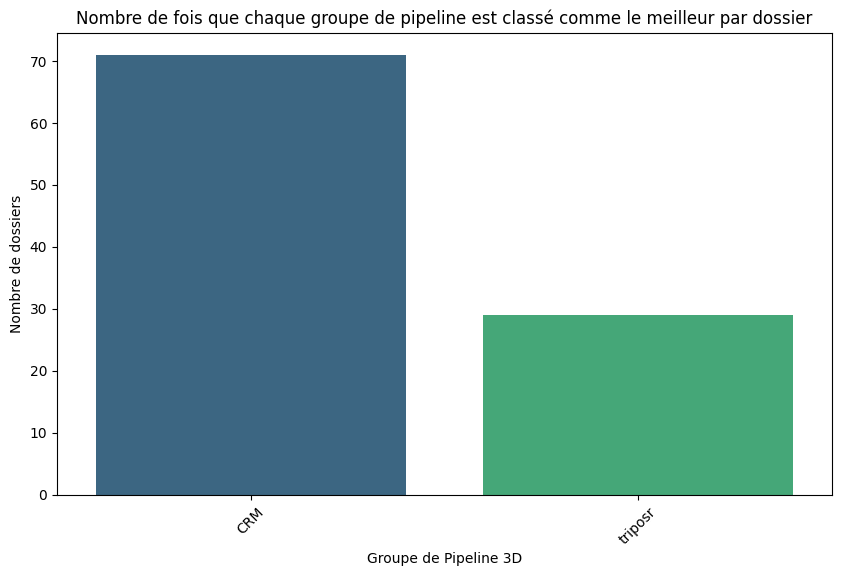

In [7]:
# Normalisation des noms des pipelines pour regrouper par type général
data['pipeline_group'] = data['pipeline'].str.extract(r'(CRM|triposr)')

# Trouver le pipeline avec le score moyen le plus élevé pour chaque dossier
best_pipelines_per_folder = data.loc[data.groupby('Folder')['Average Score'].idxmax()]

# Compter combien de fois chaque groupe de pipeline est classé comme le meilleur
best_pipeline_group_counts = best_pipelines_per_folder['pipeline_group'].value_counts()

# Affichage des résultats
print("Nombre de fois que chaque groupe de pipeline est classé comme le meilleur par dossier:")
print(best_pipeline_group_counts)

# Créer un graphique à barres pour visualiser les résultats
plt.figure(figsize=(10, 6))
sns.barplot(x=best_pipeline_group_counts.index, y=best_pipeline_group_counts.values, palette='viridis')
plt.title('Nombre de fois que chaque groupe de pipeline est classé comme le meilleur par dossier')
plt.xlabel('Groupe de Pipeline 3D')
plt.ylabel('Nombre de dossiers')
plt.xticks(rotation=45)  # Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.show()

#Conclusion Intégrée
###MVDREAM_IMAGES_CRM émerge comme le pipeline le plus performant, ayant non seulement la moyenne la plus élevée des scores moyens, mais étant également classé le plus fréquemment comme le meilleur dans les évaluations individuelles des dossiers. Cette performance est soutenue par une variabilité relativement faible des scores, ce qui indique une forte cohérence et fiabilité dans différentes conditions et avec divers types de données.

*SD_IMAGES_CRM* suit de près, avec des performances très comparables à celles de *MVDREAM_IMAGES_CRM* tant en termes de moyenne que de nombre de fois où il est classé premier. Sa performance suggère qu'il est également une option fiable et efficace pour des applications exigeantes.